# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Exploratory Data Analysis

In [2]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data.shape

(13320, 9)

In [4]:
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
for c in data.columns:
    print(c)
    print(data[c].value_counts())
    print("\n~~~~~~~~~~~~~~~~~~~~~\n")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

~~~~~~~~~~~~~~~~~~~~~

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

~~~~~~~~~~~~~~~~~~~~~

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

~~~~~~~~~~~~~~

In [8]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Data Cleaning

In [9]:
data.drop(columns=["society","balcony","availability","area_type"],inplace=True)

In [11]:
data.describe()

bath         price
count  13247.000000  13320.000000
mean       2.692610    112.565627
std        1.341458    148.971674
min        1.000000      8.000000
25%        2.000000     50.000000
50%        2.000000     72.000000
75%        3.000000    120.000000
max       40.000000   3600.000000

In [10]:
data.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [13]:
data["location"]=data["location"].fillna("Sarjapur  Road")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
data.describe()

bath         price
count  13247.000000  13320.000000
mean       2.692610    112.565627
std        1.341458    148.971674
min        1.000000      8.000000
25%        2.000000     50.000000
50%        2.000000     72.000000
75%        3.000000    120.000000
max       40.000000   3600.000000

In [16]:
data["size"]=data["size"].fillna("2 BHK")

In [17]:
data.duplicated().sum()

882

In [18]:
data["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [19]:
data["bath"].isna().sum()

73

# Data Visualisation

c:\Users\utkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bath', ylabel='count'>

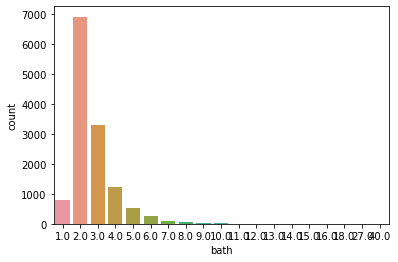

In [20]:
sns.countplot(data["bath"])

In [21]:
data["bath"]

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [22]:
print(data.isna().sum())
data.isnull().sum()

location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64


location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [23]:
data.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

<AxesSubplot:>

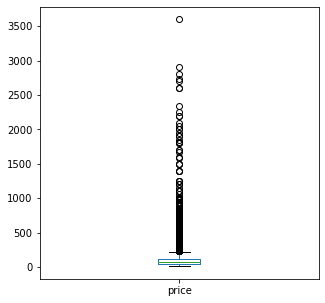

In [24]:
data.boxplot(column=["price"],figsize=(5,5),grid=False)

In [25]:
data.price.median()

72.0

In [26]:
zscore=(data["price"]-data["price"].mean())/(data["price"].std())
outliers=zscore[zscore>3]
outliers.count()

192

In [27]:
data.corr()

bath     price
bath   1.000000  0.456345
price  0.456345  1.000000

<AxesSubplot:>

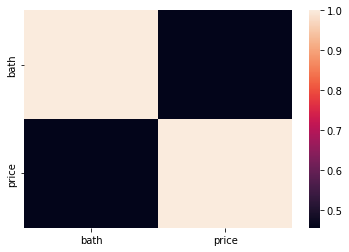

In [28]:
sns.heatmap(data.corr())

In [29]:
data

location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]

In [30]:
data["size"].isna().sum()

0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [32]:
data.bath=data.bath.fillna(data.bath.median())

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [34]:
data.bath.isna().sum()

0

In [35]:
data["bhk"]=data["size"].str.split().str.get(0).astype(int)

In [36]:
data[data.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [37]:
def conv(x):
    a=x.split("-")
    if len(a)==2:
        return (float(a[0])+float(a[1]))/2
    try:
        return float(x)
    except:
        return None

In [38]:
data.total_sqft=data.total_sqft.apply(conv)

In [39]:
data.total_sqft.isna().sum()

46

In [40]:
data

location       size  total_sqft  bath   price  bhk
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2
...                         ...        ...         ...   ...     ...  ...
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00    5
13316             Richards Town      4 BHK      3600.0   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4
13319              Doddathoguru      1 BHK       550.0   1.0   17.00    1

[13320 rows x 6 columns]

In [41]:
data["ppsqft"]=data["price"]*100000/data.total_sqft

In [42]:
data.drop(columns=["size"],inplace=True)

In [43]:
data

location  total_sqft  bath   price  bhk        ppsqft
0      Electronic City Phase II      1056.0   2.0   39.07    2   3699.810606
1              Chikka Tirupathi      2600.0   5.0  120.00    4   4615.384615
2                   Uttarahalli      1440.0   2.0   62.00    3   4305.555556
3            Lingadheeranahalli      1521.0   3.0   95.00    3   6245.890861
4                      Kothanur      1200.0   2.0   51.00    2   4250.000000
...                         ...         ...   ...     ...  ...           ...
13315                Whitefield      3453.0   4.0  231.00    5   6689.834926
13316             Richards Town      3600.0   5.0  400.00    4  11111.111111
13317     Raja Rajeshwari Nagar      1141.0   2.0   60.00    2   5258.545136
13318           Padmanabhanagar      4689.0   4.0  488.00    4  10407.336319
13319              Doddathoguru       550.0   1.0   17.00    1   3090.909091

[13320 rows x 6 columns]

In [44]:
data.location=data.location.apply(lambda x: x.strip())
loc_cnt=data.location.value_counts()
loc_cnt

Whitefield                        541
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [45]:
loc_less_10=loc_cnt[loc_cnt<=10]
loc_less_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [46]:
data.location=data.location.apply(lambda x: "other" if x in loc_less_10 else x)

In [47]:
data.location.value_counts()

other                 2885
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [48]:
data

location  total_sqft  bath   price  bhk        ppsqft
0      Electronic City Phase II      1056.0   2.0   39.07    2   3699.810606
1              Chikka Tirupathi      2600.0   5.0  120.00    4   4615.384615
2                   Uttarahalli      1440.0   2.0   62.00    3   4305.555556
3            Lingadheeranahalli      1521.0   3.0   95.00    3   6245.890861
4                      Kothanur      1200.0   2.0   51.00    2   4250.000000
...                         ...         ...   ...     ...  ...           ...
13315                Whitefield      3453.0   4.0  231.00    5   6689.834926
13316                     other      3600.0   5.0  400.00    4  11111.111111
13317     Raja Rajeshwari Nagar      1141.0   2.0   60.00    2   5258.545136
13318           Padmanabhanagar      4689.0   4.0  488.00    4  10407.336319
13319              Doddathoguru       550.0   1.0   17.00    1   3090.909091

[13320 rows x 6 columns]

In [49]:
(data["total_sqft"]/data["bhk"]).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [50]:
data=data[(data.total_sqft/data.bhk)>=300]
data.describe()

total_sqft          bath         price           bhk         ppsqft
count  12530.000000  12530.000000  12530.000000  12530.000000   12530.000000
mean    1594.564544      2.559537    111.382401      2.650838    6303.979357
std     1261.271296      1.077938    152.077329      0.976678    4162.237981
min      300.000000      1.000000      8.440000      1.000000     267.829813
25%     1116.000000      2.000000     49.000000      2.000000    4210.526316
50%     1300.000000      2.000000     70.000000      3.000000    5294.117647
75%     1700.000000      3.000000    115.000000      3.000000    6916.666667
max    52272.000000     16.000000   3600.000000     16.000000  176470.588235

In [51]:
data.shape

(12530, 6)

# Outliers Removal

In [52]:
def rem_outlier(df):
    dfout=pd.DataFrame()
    for k,subdf in df.groupby("location"):
        m=np.mean(subdf.ppsqft)
        st=np.std(subdf.ppsqft)
        gendf=subdf[(subdf.ppsqft>(m-st)) & (subdf.ppsqft<=(m+st))]
        dfout=pd.concat([dfout,gendf],ignore_index=True)
    return dfout
data=rem_outlier(data)
data

location  total_sqft  bath   price  bhk        ppsqft
0      1st Block Jayanagar      2850.0   4.0  428.00    4  15017.543860
1      1st Block Jayanagar      1630.0   3.0  194.00    3  11901.840491
2      1st Block Jayanagar      1875.0   2.0  235.00    3  12533.333333
3      1st Block Jayanagar      1200.0   2.0  130.00    3  10833.333333
4      1st Block Jayanagar      1235.0   2.0  148.00    2  11983.805668
...                    ...         ...   ...     ...  ...           ...
10296                other      1353.0   2.0  110.00    2   8130.081301
10297                other       812.0   1.0   26.00    1   3201.970443
10298                other      1440.0   2.0   63.93    3   4439.583333
10299                other      1075.0   2.0   48.00    2   4465.116279
10300                other      3600.0   5.0  400.00    4  11111.111111

[10301 rows x 6 columns]

In [53]:
data.describe()

total_sqft          bath         price           bhk        ppsqft
count  10301.000000  10301.000000  10301.000000  10301.000000  10301.000000
mean    1508.440608      2.471702     91.286372      2.574896   5659.062876
std      880.694214      0.979449     86.342786      0.897649   2265.774749
min      300.000000      1.000000     10.000000      1.000000   1250.000000
25%     1110.000000      2.000000     49.000000      2.000000   4244.897959
50%     1286.000000      2.000000     67.000000      2.000000   5175.600739
75%     1650.000000      3.000000    100.000000      3.000000   6428.571429
max    30400.000000     16.000000   2200.000000     16.000000  24509.803922

In [54]:
data[data.bhk>10]

location  total_sqft  bath  price  bhk       ppsqft
8082    other      5000.0   9.0  360.0   11  7200.000000
8632    other     10000.0  16.0  550.0   16  5500.000000
9365    other      6000.0  12.0  150.0   11  2500.000000
9697    other      5425.0  13.0  275.0   13  5069.124424

In [55]:
def rem_outlier_bhk(df):
    exc=np.array([])
    for loc,locdf in df.groupby("location"):
        bhkstats={}
        for bhk,bhkdf in locdf.groupby("bhk"):
            bhkstats[bhk]={
                "mean":np.mean(bhkdf.ppsqft),
                "std":np.std(bhkdf.ppsqft),
                "count":bhkdf.shape[0]
            }
        for bhk,bhkdf in locdf.groupby("bhk"):
            stats=bhkstats.get(bhk-1)
            if stats and stats["count"]>5:
                exc=np.append(exc,bhkdf[bhkdf.ppsqft<(stats["mean"])].index.values)
    return df.drop(exc,axis="index")

In [56]:
data=rem_outlier_bhk(data)

In [57]:
data

location  total_sqft  bath  price  bhk        ppsqft
0      1st Block Jayanagar      2850.0   4.0  428.0    4  15017.543860
1      1st Block Jayanagar      1630.0   3.0  194.0    3  11901.840491
2      1st Block Jayanagar      1875.0   2.0  235.0    3  12533.333333
3      1st Block Jayanagar      1200.0   2.0  130.0    3  10833.333333
4      1st Block Jayanagar      1235.0   2.0  148.0    2  11983.805668
...                    ...         ...   ...    ...  ...           ...
10292                other      1200.0   2.0   70.0    2   5833.333333
10293                other      1800.0   1.0  200.0    1  11111.111111
10296                other      1353.0   2.0  110.0    2   8130.081301
10297                other       812.0   1.0   26.0    1   3201.970443
10300                other      3600.0   5.0  400.0    4  11111.111111

[7360 rows x 6 columns]

In [58]:
data.shape

(7360, 6)

In [59]:
data.drop(columns=["ppsqft"],inplace=True)

In [60]:
data

location  total_sqft  bath  price  bhk
0      1st Block Jayanagar      2850.0   4.0  428.0    4
1      1st Block Jayanagar      1630.0   3.0  194.0    3
2      1st Block Jayanagar      1875.0   2.0  235.0    3
3      1st Block Jayanagar      1200.0   2.0  130.0    3
4      1st Block Jayanagar      1235.0   2.0  148.0    2
...                    ...         ...   ...    ...  ...
10292                other      1200.0   2.0   70.0    2
10293                other      1800.0   1.0  200.0    1
10296                other      1353.0   2.0  110.0    2
10297                other       812.0   1.0   26.0    1
10300                other      3600.0   5.0  400.0    4

[7360 rows x 5 columns]

# Exporting Cleaned CSV

In [61]:
data.to_csv("Clean_Data_Price.csv")

In [62]:
X=data.drop(columns=['price'])
y=data['price']
X.shape,y.shape

((7360, 4), (7360,))

# Importing Required Libraries

In [87]:
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import r2_score

# Test Train Split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
print(X.shape,y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7360, 4) (7360,)
(5888, 4)
(1472, 4)
(5888,)
(1472,)


In [90]:
scaler=StandardScaler()
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder="passthrough")

# Making Pipeline And Fitting to Model

In [91]:
pipe = make_pipeline(column_trans, scaler, LinearRegression())
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

0.8296506897110998

In [92]:
pipe = make_pipeline(column_trans, scaler, Lasso())
pipe.fit(X_train,y_train)
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8199181874762704

In [93]:
pipe = make_pipeline(column_trans, scaler, ElasticNet())
pipe.fit(X_train,y_train)
y_pred_elastic=pipe.predict(X_test)
r2_score(y_test,y_pred_elastic)

0.7728405046673602

In [94]:
pipe = make_pipeline(column_trans, scaler, Ridge())
pipe.fit(X_train,y_train)
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8296651410179725

# Checking R2 Scores

In [95]:
print('No Regularization : ', r2_score(y_test, y_pred_lr))
print('Lasso Regularization : ', r2_score(y_test, y_pred_lasso))
print("ElasticNet Regularization : ",r2_score(y_test,y_pred_elastic))
print('Ridge Regularization : ', r2_score(y_test, y_pred_ridge))


No Regularization :  0.8296506897110998
Lasso Regularization :  0.8199181874762704
ElasticNet Regularization :  0.7728405046673602
Ridge Regularization :  0.8296651410179725


# Dumping Model through Pickle

In [96]:
import pickle

In [97]:
pickle.dump(pipe,open("RidgeModel.pkl","wb"))

In [98]:
from xgboost import XGBRegressor

In [123]:
pipe = make_pipeline(column_trans, scaler, XGBRegressor())
pipe.fit(X_train, y_train)
y_pred_xgb = pipe.predict(X_test)
r2_score(y_test,y_pred_xgb)

0.5343817967856309